# 28 - Advanced Sampling Techniques

**Key Idea:** Sometimes simple random sampling doesn't work well, so we use smarter techniques:

- **Cluster Sampling:** Pick whole groups (schools, cities)
- **Stratified Sampling:** Ensure subgroups are represented (age, gender, grade)
- **Systematic Sampling:** Pick every nth person (every 10th name)
- **Adaptive Sampling:** Adjust on the fly if groups look underrepresented

Each method balances **cost, effort, and fairness**.

## Simple Example: School Survey Comparison

Let's survey 1,000 students from 10 schools (100 students per school, 4 grade levels). We'll compare three methods visually.

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62518/1249866630.py:26: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  stratified_sample = population_df.groupby('grade', group_keys=False).apply(


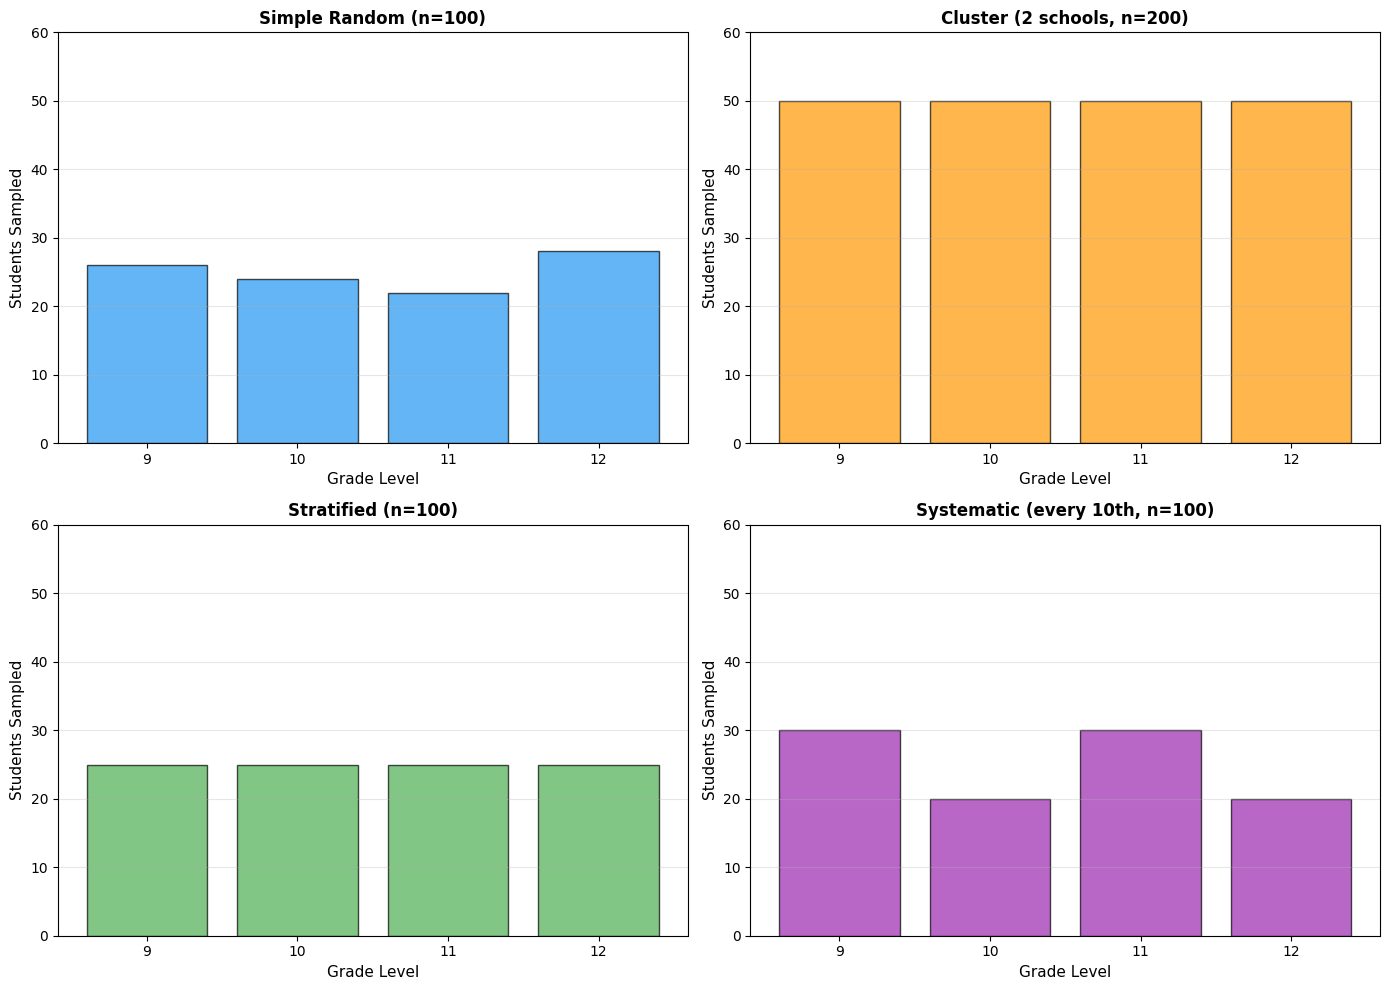


📊 Grade Distribution Summary:

Simple Random (n=100):
grade
9     26
10    24
11    22
12    28

Cluster (2 schools, n=200):
grade
9     50
10    50
11    50
12    50

Stratified (n=100):
grade
9     25
10    25
11    25
12    25

Systematic (every 10th, n=100):
grade
9     30
10    20
11    30
12    20


✅ STRATIFIED ensures balanced representation across grades!
💰 CLUSTER is cheaper (only visit 2 schools)
⚠️ SIMPLE RANDOM might miss grades or over-sample others


In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

np.random.seed(42)

# Create population: 1,000 students across 10 schools, 4 grades each
schools = np.repeat(range(1, 11), 100)  # School IDs
grades = np.tile(np.repeat(range(9, 13), 25), 10)  # Grades 9-12, 25 per grade per school
student_ids = np.arange(1, 1001)

population_df = pd.DataFrame({
    'student_id': student_ids,
    'school': schools,
    'grade': grades
})

# Method 1: Simple Random Sampling (pick any 100 students)
simple_random_sample = population_df.sample(n=100, random_state=42)

# Method 2: Cluster Sampling (pick 2 entire schools)
selected_schools = [3, 7]  # Pick schools 3 and 7
cluster_sample = population_df[population_df['school'].isin(selected_schools)]

# Method 3: Stratified Sampling (ensure each grade is represented proportionally)
stratified_sample = population_df.groupby('grade', group_keys=False).apply(
    lambda x: x.sample(n=25, random_state=42)
)

# Method 4: Systematic Sampling (every 10th student)
systematic_sample = population_df.iloc[::10]

# Visualize grade distribution
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

methods = [
    ('Simple Random (n=100)', simple_random_sample),
    ('Cluster (2 schools, n=200)', cluster_sample),
    ('Stratified (n=100)', stratified_sample),
    ('Systematic (every 10th, n=100)', systematic_sample)
]

colors = ['#2196F3', '#FF9800', '#4CAF50', '#9C27B0']

for idx, ((name, sample), color) in enumerate(zip(methods, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Count students by grade
    grade_counts = sample['grade'].value_counts().sort_index()
    
    ax.bar(grade_counts.index, grade_counts.values, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel('Grade Level', fontsize=11)
    ax.set_ylabel('Students Sampled', fontsize=11)
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xticks([9, 10, 11, 12])
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, max(60, grade_counts.max() + 10))

plt.tight_layout()
plt.show()

print("\n📊 Grade Distribution Summary:")
print("="*60)
for name, sample in methods:
    grade_dist = sample['grade'].value_counts().sort_index()
    print(f"\n{name}:")
    print(grade_dist.to_string())

print("\n\n✅ STRATIFIED ensures balanced representation across grades!")
print("💰 CLUSTER is cheaper (only visit 2 schools)")
print("⚠️ SIMPLE RANDOM might miss grades or over-sample others")

## Visual Comparison: School Coverage

Let's see which schools get sampled under each method.

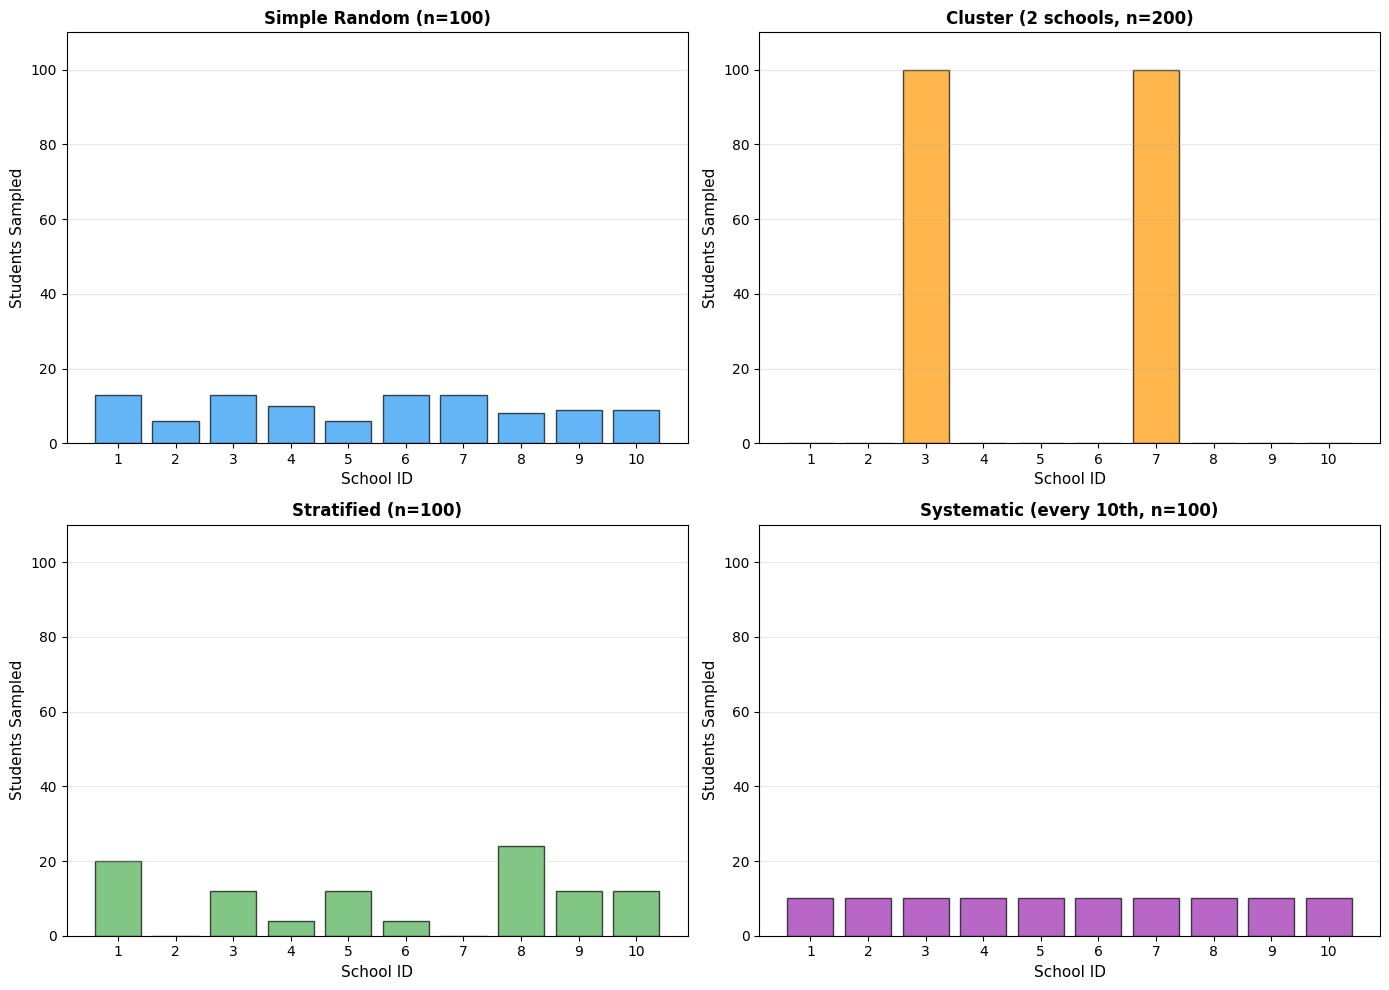


🏫 School Coverage Analysis:

✅ CLUSTER: Focuses on specific schools (cheaper to visit)
✅ STRATIFIED: Spreads across all schools for better representation
⚠️ SIMPLE RANDOM: Uneven coverage, some schools over/under-sampled
⚠️ SYSTEMATIC: Depends on list order (can introduce bias)


In [2]:
# Visualize school coverage
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

for idx, ((name, sample), color) in enumerate(zip(methods, colors)):
    ax = axes[idx // 2, idx % 2]
    
    # Count students by school
    school_counts = sample['school'].value_counts().sort_index()
    all_schools = range(1, 11)
    school_values = [school_counts.get(s, 0) for s in all_schools]
    
    ax.bar(all_schools, school_values, color=color, alpha=0.7, edgecolor='black')
    ax.set_xlabel('School ID', fontsize=11)
    ax.set_ylabel('Students Sampled', fontsize=11)
    ax.set_title(name, fontsize=12, fontweight='bold')
    ax.set_xticks(all_schools)
    ax.grid(axis='y', alpha=0.3)
    ax.set_ylim(0, 110)

plt.tight_layout()
plt.show()

print("\n🏫 School Coverage Analysis:")
print("="*60)
print("\n✅ CLUSTER: Focuses on specific schools (cheaper to visit)")
print("✅ STRATIFIED: Spreads across all schools for better representation")
print("⚠️ SIMPLE RANDOM: Uneven coverage, some schools over/under-sampled")
print("⚠️ SYSTEMATIC: Depends on list order (can introduce bias)")

## Real-World Example: Global Customer Survey

A company wants to survey 1,000 customers globally. They need to balance:
- **Cost:** Visiting customers vs. online surveys
- **Representation:** Ensuring all age groups and regions are included
- **Accuracy:** Getting reliable estimates

Let's compare approaches with a cost-accuracy trade-off.

In [3]:
# Simulate global customer population
np.random.seed(42)

# 50,000 customers across 5 regions and 4 age groups
regions = ['North America', 'Europe', 'Asia', 'South America', 'Africa']
age_groups = ['18-30', '31-45', '46-60', '61+']

# Create customer base with realistic distribution
region_dist = [0.30, 0.25, 0.30, 0.10, 0.05]  # More customers in NA, Europe, Asia
age_dist = [0.35, 0.35, 0.20, 0.10]  # Younger customers more common

n_customers = 50000
customer_regions = np.random.choice(regions, size=n_customers, p=region_dist)
customer_ages = np.random.choice(age_groups, size=n_customers, p=age_dist)

# Simulate satisfaction scores (varies by age and region)
satisfaction = np.random.normal(7.5, 1.5, n_customers)  # Base satisfaction ~7.5/10
satisfaction = np.clip(satisfaction, 1, 10)  # Keep in valid range

customers_df = pd.DataFrame({
    'customer_id': range(1, n_customers + 1),
    'region': customer_regions,
    'age_group': customer_ages,
    'satisfaction': satisfaction
})

true_mean = customers_df['satisfaction'].mean()

print(f"🌍 Global Customer Base: {n_customers:,} customers")
print(f"📊 True Average Satisfaction: {true_mean:.2f}/10")
print(f"\nRegion Distribution:")
print(customers_df['region'].value_counts())
print(f"\nAge Group Distribution:")
print(customers_df['age_group'].value_counts())

🌍 Global Customer Base: 50,000 customers
📊 True Average Satisfaction: 7.47/10

Region Distribution:
region
North America    15059
Asia             14969
Europe           12515
South America     4987
Africa            2470
Name: count, dtype: int64

Age Group Distribution:
age_group
18-30    17558
31-45    17398
46-60    10195
61+       4849
Name: count, dtype: int64


In [4]:
# Compare sampling methods with cost and accuracy
sample_size = 1000
n_simulations = 100

results = []

# Method 1: Simple Random Sampling
# Cost: Low (online survey), Accuracy: Good but might miss rare groups
simple_means = []
for i in range(n_simulations):
    sample = customers_df.sample(n=sample_size, random_state=i)
    simple_means.append(sample['satisfaction'].mean())

results.append({
    'Method': 'Simple Random',
    'Cost': 'Low ($10K)',
    'Mean Error': np.mean(np.abs(np.array(simple_means) - true_mean)),
    'Std Dev': np.std(simple_means),
    'Sample Mean': np.mean(simple_means)
})

# Method 2: Stratified Sampling (by region and age)
# Cost: Medium (ensures representation), Accuracy: Best
stratified_means = []
for i in range(n_simulations):
    # Sample proportionally from each region-age combination
    sample = customers_df.groupby(['region', 'age_group'], group_keys=False).apply(
        lambda x: x.sample(n=max(1, int(sample_size * len(x) / len(customers_df))), random_state=i)
    ).sample(n=sample_size, random_state=i)  # Ensure exactly 1000
    stratified_means.append(sample['satisfaction'].mean())

results.append({
    'Method': 'Stratified',
    'Cost': 'Medium ($15K)',
    'Mean Error': np.mean(np.abs(np.array(stratified_means) - true_mean)),
    'Std Dev': np.std(stratified_means),
    'Sample Mean': np.mean(stratified_means)
})

# Method 3: Cluster Sampling (sample entire regions)
# Cost: High (visit specific regions), Accuracy: Lower (less diverse)
cluster_means = []
for i in range(n_simulations):
    # Randomly select 2-3 regions and sample heavily from them
    selected_regions = np.random.choice(regions, size=3, replace=False)
    sample = customers_df[customers_df['region'].isin(selected_regions)].sample(n=sample_size, random_state=i)
    cluster_means.append(sample['satisfaction'].mean())

results.append({
    'Method': 'Cluster',
    'Cost': 'High ($25K)',
    'Mean Error': np.mean(np.abs(np.array(cluster_means) - true_mean)),
    'Std Dev': np.std(cluster_means),
    'Sample Mean': np.mean(cluster_means)
})

# Method 4: Systematic Sampling
# Cost: Very Low (easy to implement), Accuracy: Can be biased
systematic_means = []
for i in range(n_simulations):
    start = np.random.randint(0, 50)
    sample = customers_df.iloc[start::50][:sample_size]
    systematic_means.append(sample['satisfaction'].mean())

results.append({
    'Method': 'Systematic',
    'Cost': 'Very Low ($8K)',
    'Mean Error': np.mean(np.abs(np.array(systematic_means) - true_mean)),
    'Std Dev': np.std(systematic_means),
    'Sample Mean': np.mean(systematic_means)
})

results_df = pd.DataFrame(results)

print("\n📊 Sampling Method Comparison:")
print("="*70)
print(f"\nTrue Population Mean: {true_mean:.3f}")
print(f"\n{results_df.to_string(index=False)}")

/var/folders/0v/80zxmry158l85b2sy7ywwj5w0000gn/T/ipykernel_62518/2022178745.py:27: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  sample = customers_df.groupby(['region', 'age_group'], group_keys=False).apply(


ValueError: Cannot take a larger sample than population when 'replace=False'

In [ ]:
# Visualize accuracy vs cost
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot 1: Distribution of estimates
all_means = [simple_means, stratified_means, cluster_means, systematic_means]
labels = ['Simple\nRandom', 'Stratified', 'Cluster', 'Systematic']
colors_box = ['#2196F3', '#4CAF50', '#FF9800', '#9C27B0']

bp = ax1.boxplot(all_means, labels=labels, patch_artist=True, widths=0.6)
for patch, color in zip(bp['boxes'], colors_box):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)

ax1.axhline(y=true_mean, color='red', linestyle='--', linewidth=2, label=f'True Mean: {true_mean:.2f}')
ax1.set_ylabel('Satisfaction Score (1-10)', fontsize=12)
ax1.set_title('Accuracy Comparison\n(100 simulations per method)', fontsize=13, fontweight='bold')
ax1.legend()
ax1.grid(axis='y', alpha=0.3)

# Plot 2: Cost vs Accuracy trade-off
costs = [10, 15, 25, 8]  # in thousands
errors = results_df['Mean Error'].values

for i, (cost, error, label, color) in enumerate(zip(costs, errors, labels, colors_box)):
    ax2.scatter(cost, error, s=500, color=color, alpha=0.7, edgecolor='black', linewidth=2)
    ax2.annotate(label, (cost, error), textcoords="offset points", xytext=(0, 10),
                ha='center', fontsize=10, fontweight='bold')

ax2.set_xlabel('Cost ($1,000s)', fontsize=12)
ax2.set_ylabel('Mean Absolute Error', fontsize=12)
ax2.set_title('Cost vs. Accuracy Trade-off', fontsize=13, fontweight='bold')
ax2.grid(alpha=0.3)
ax2.set_xlim(5, 30)

plt.tight_layout()
plt.show()

print("\n💡 Key Insights:")
print("="*70)
print("\n✅ STRATIFIED SAMPLING wins for accuracy:")
print("   - Ensures all age groups and regions are represented")
print("   - Lowest variability in estimates")
print("   - Worth the moderate extra cost")

print("\n💰 SYSTEMATIC SAMPLING is cheapest:")
print("   - Very easy to implement")
print("   - But can miss patterns if data has hidden structure")

print("\n⚠️ CLUSTER SAMPLING is expensive and less accurate:")
print("   - Good for geographic surveys where travel is costly")
print("   - Less precise because focuses on fewer regions")

print("\n🎯 RECOMMENDATION: Use STRATIFIED for important business decisions")
print("   where representation matters!")

## Summary: When to Use Each Method

| Method | Best For | Pros | Cons |
|--------|----------|------|------|
| **Simple Random** | Fair baseline | Easy, unbiased | May miss rare groups |
| **Stratified** | Ensuring subgroup representation | Most accurate, balanced | Requires knowing subgroups |
| **Cluster** | Geographic efficiency | Saves travel costs | Less precise |
| **Systematic** | Quick implementation | Very easy | Hidden patterns can bias |

**Real-World Lesson:** For the global customer survey, **stratified sampling** is the clear winner—ensuring age groups and regions are properly represented leads to better business decisions!